Sondos Mohamed

Task 5

This is a sales prediction machine learning project. The goal is to build a model that accurately forecasts sales based on advertising expenditures. Using tools like Colab, Python, Pandas, and Scikit-learn, we will preprocess the data, train regression models, evaluate their performance, and visualize the results to gain insights.



In [1]:
# Importing the necessary libraries
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
# Load the sales data into a DataFrame
data = pd.read_csv('/content/Advertising.csv')
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
# Perform feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['TV', 'Radio', 'Newspaper']])
data[['TV', 'Radio', 'Newspaper']] = scaled_data

In [4]:
data.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [5]:
scaled_data = data.drop(['Unnamed: 0'], axis=1)

In [6]:
scaled_data.shape

(200, 4)

In [7]:
scaled_data.describe

<bound method NDFrame.describe of            TV     Radio  Newspaper  Sales
0    0.969852  0.981522   1.778945   22.1
1   -1.197376  1.082808   0.669579   10.4
2   -1.516155  1.528463   1.783549    9.3
3    0.052050  1.217855   1.286405   18.5
4    0.394182 -0.841614   1.281802   12.9
..        ...       ...        ...    ...
195 -1.270941 -1.321031  -0.771217    7.6
196 -0.617035 -1.240003  -1.033598    9.7
197  0.349810 -0.942899  -1.111852   12.8
198  1.594565  1.265121   1.640850   25.5
199  0.993206 -0.990165  -1.005979   13.4

[200 rows x 4 columns]>

In [8]:
scaled_data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

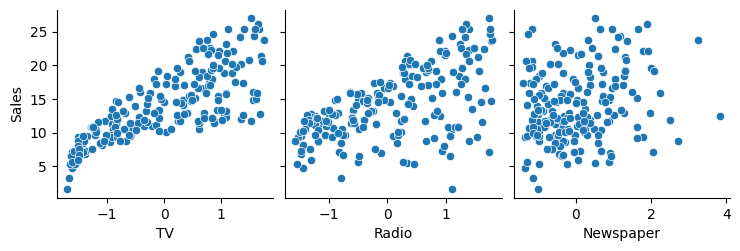

In [9]:
import seaborn as sns

# Create a pairplot to observe the relationships between variables
sns.pairplot(scaled_data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='scatter')

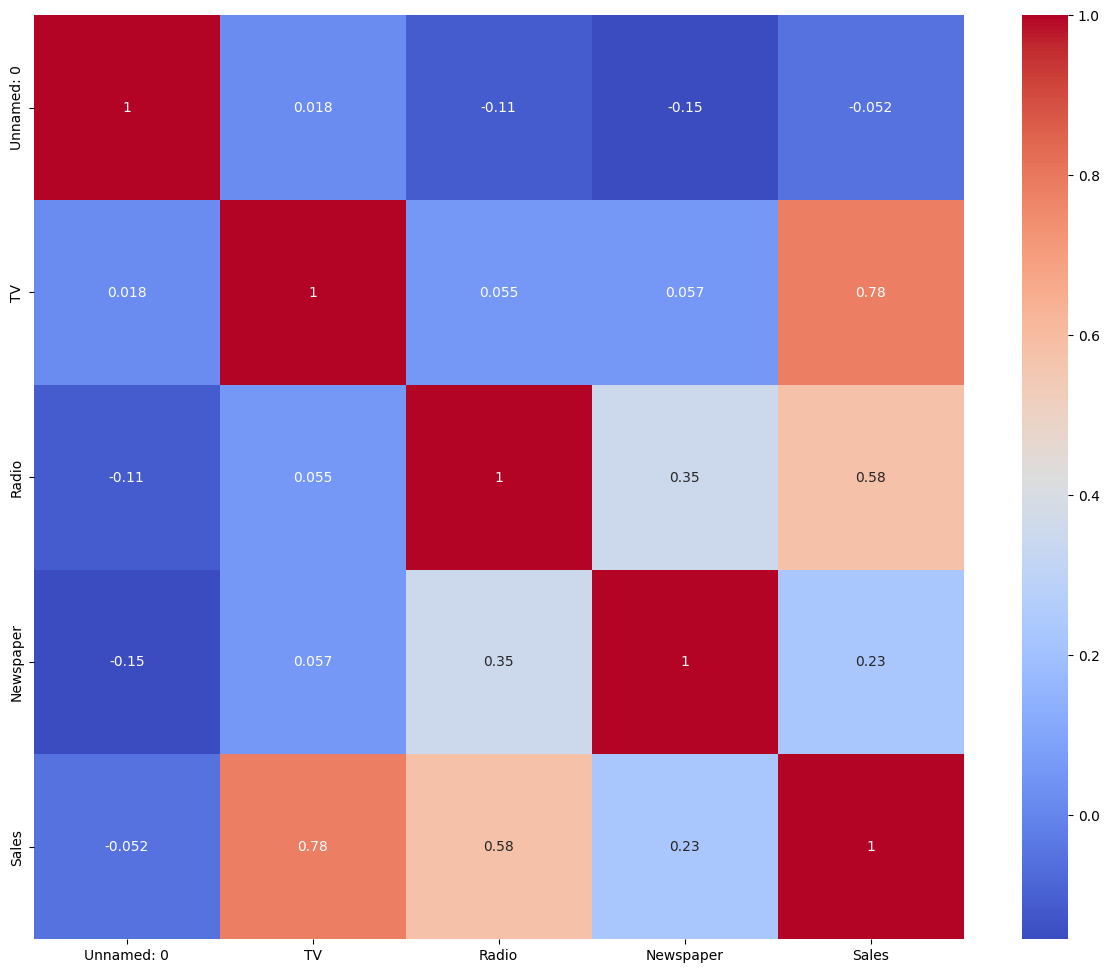

In [10]:
plt.figure(figsize=(15,12))
correlations = data.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

In [11]:
# Create the feature matrix X and target variable y
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

In [12]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

MODEL 1:  Linear Regression

In [13]:
# Create an instance of the Linear Regression model
model = LinearRegression()

In [14]:
# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Make predictions on the test data
predictions = model.predict(X_test)

In [16]:
# Evaluate the model's performance
score = model.score(X_test, y_test)
print("R-squared Score:", score)

R-squared Score: 0.8994380241009119


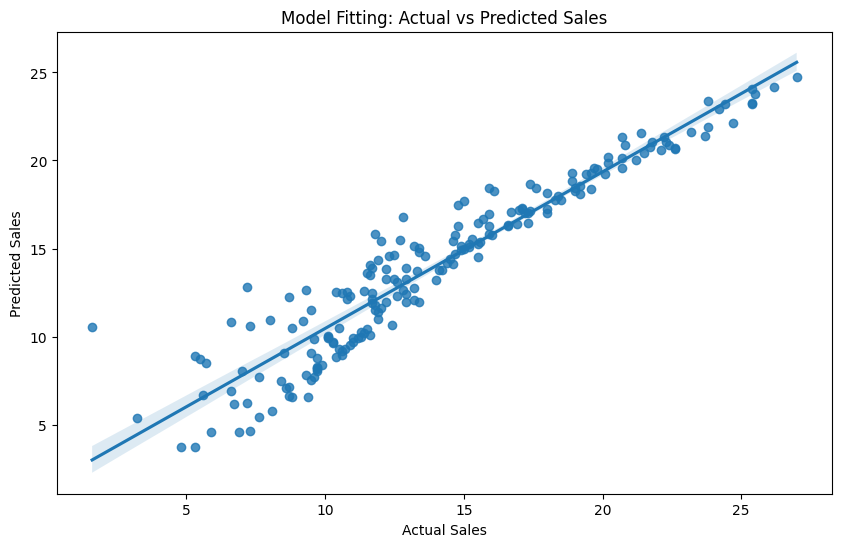

In [17]:
# Visualize the model's fitting
plt.figure(figsize=(10, 6))
sns.regplot(x=y, y=model.predict(X), data=data)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Model Fitting: Actual vs Predicted Sales')
plt.show()

MODEL 2: Random Forest model

In [18]:
# Create an instance of the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

In [19]:
# Fit the Random Forest model to the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [20]:
# Make predictions using the trained models
rf_predictions = rf_model.predict(X_test)

In [21]:
# Calculate the R2 score for each model
rf_r2 = r2_score(y_test, rf_predictions)
# Print the R2 score for each model
print(f"Random Forest R2 Score: {rf_r2:.2f}")

Random Forest R2 Score: 0.98


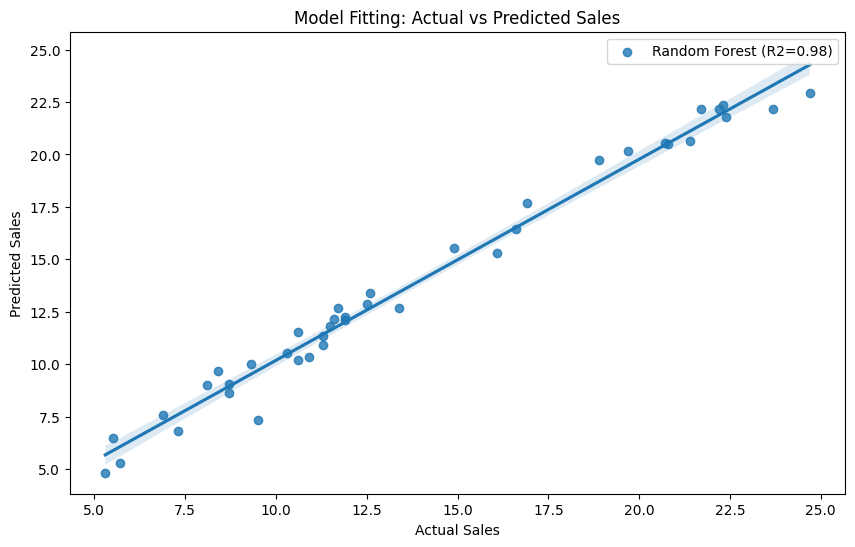

In [22]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=rf_predictions, label=f'Random Forest (R2={rf_r2:.2f})')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Model Fitting: Actual vs Predicted Sales')
plt.legend()
plt.show()

MODEL 3: Gradient Boosting model

In [24]:
# Create an instance of the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

In [25]:
# Fit the Gradient Boosting model to the training data
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [26]:
# Make predictions using the trained models
gb_predictions = gb_model.predict(X_test)

In [27]:
# Calculate the R2 score for each model
gb_r2 = r2_score(y_test, gb_predictions)

# Print the R2 score for each model
print(f"Gradient Boosting R2 Score: {gb_r2:.2f}")

Gradient Boosting R2 Score: 0.98


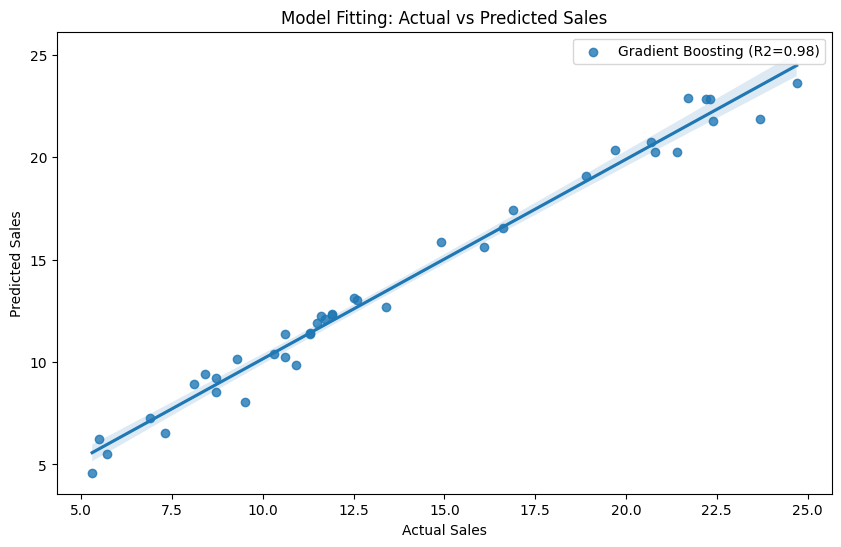

In [28]:
# Visualize the model's fitting
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=gb_predictions, label=f'Gradient Boosting (R2={gb_r2:.2f})')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Model Fitting: Actual vs Predicted Sales')
plt.legend()
plt.show()

Both the gradient boosting and random forest models exhibit high accuracy and are reliable for use. Additionally, it's noteworthy that each model achieved an impressive R2 score of 0.98.